In [6]:
import tensorflow as tf
from KyleNet import KyleNet
from pathlib import Path

# Get the metadata
META = Path(".").resolve().joinpath("metadata.csv")

In [7]:
if tf.test.gpu_device_name():
    print(f"GPU Device: {tf.test.gpu_device_name()}\n")
else:
    print("Running off of CPU\n")

GPU Device: /device:GPU:0



## Experiment 2.
##### This experiment is ran with a balanced dataset so that there's an equal number of COVID-19 and NON-COVID classes

In [8]:
# Call the KyleNet class
exp2 = KyleNet(META, "Experiment 2", True)

Found 61685 validated image filenames belonging to 2 classes.
Found 15421 validated image filenames belonging to 2 classes.


In [9]:
# Check the datasets been balanced and it's correct
print(f"Overall Balance:\n{exp2.df['finding'].value_counts()}\n")
print(f"Balance for CXR:\n{exp2.df.loc[exp2.df['modality'] == 'X-ray', 'finding'].value_counts()}\n")
print(f"Balance for CT:\n{exp2.df.loc[exp2.df['modality'] == 'CT', 'finding'].value_counts()}")

Overall Balance:
COVID-19     38553
NON-COVID    38553
Name: finding, dtype: int64

Balance for CXR:
NON-COVID    382
COVID-19     287
Name: finding, dtype: int64

Balance for CT:
COVID-19     38266
NON-COVID    38171
Name: finding, dtype: int64


Epoch 1/20
481/481 [==============================] - 303s 630ms/step - loss: 0.0602 - accuracy: 0.9776 - val_loss: 0.8969 - val_accuracy: 0.6028

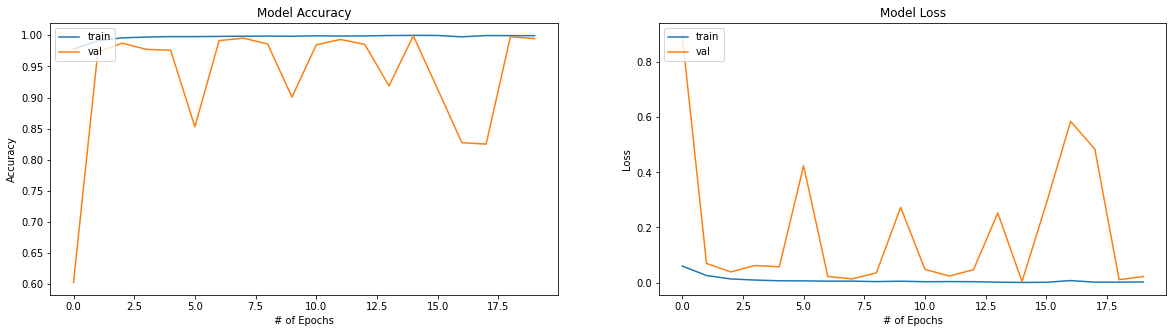

In [10]:
# Train the model
exp2.Train()

In [11]:
# Evaluate the models performance
exp2.Evaluate()

121/121 [==============================] - 56s 461ms/step - loss: 0.0219 - accuracy: 0.9946

In [12]:
predictions = exp2.Predict()

121/121 [==============================] - 56s 466ms/step

In [13]:
exp2.MetricReport(predictions)

              precision    recall  f1-score   support

    COVID-19       1.00      0.99      0.99      7720
   NON-COVID       0.99      1.00      0.99      7701

    accuracy                           0.99     15421
   macro avg       0.99      0.99      0.99     15421
weighted avg       0.99      0.99      0.99     15421



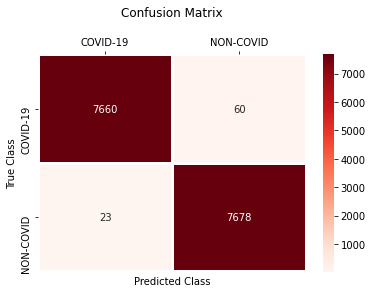

In [14]:
exp2.ConfusionMatrix(predictions)

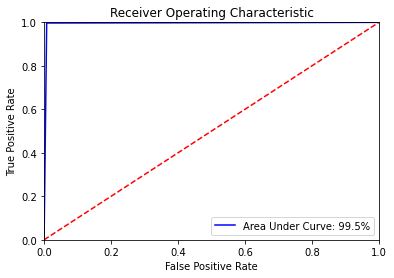

In [15]:
exp2.ROC(predictions)

In [16]:
exp2.Save()